D =  5  jours  ->  MC = 9.3676   LT = 9.5868
D =  7  jours  ->  MC = 9.3034   LT = 9.3551
D =  9  jours  ->  MC = 9.2340   LT = 9.2709
D = 11  jours  ->  MC = 9.1526   LT = 9.2522
D = 13  jours  ->  MC = 9.0719   LT = 9.2222
D = 15  jours  ->  MC = 8.9917   LT = 9.1293
D = 17  jours  ->  MC = 8.9105   LT = 8.9561
D = 19  jours  ->  MC = 8.8268   LT = 8.7209


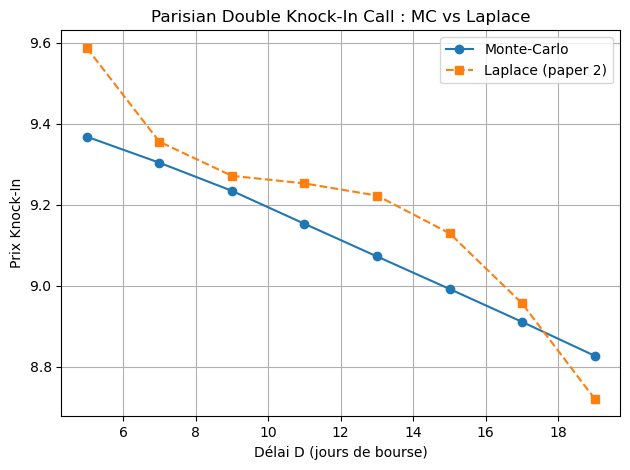

In [9]:
import numpy as np, matplotlib.pyplot as plt
from laplace_double_parisian import price_parisian_double_in_call_lt
from mc_double_parisian   import simulate_paths_bs, price_parisian_double_in_call_mc

S0, K, L, U = 100, 100, 90, 110
r, q, sigma  = 0.03, 0.0, 0.2
T, steps     = 1.0, 252
paths        = 40_000         
sub          = 5              

delays_days  = np.arange(5, 20, 2)
mc_prices, lt_prices = [], []


for d in delays_days:
    D = d/252
    S = simulate_paths_bs(S0, r, q, sigma, T, steps, paths,
                          seed=123, sub=sub)
    mc = price_parisian_double_in_call_mc(S, K, L, U, r, T, D,
                                          steps*sub)
    lt = price_parisian_double_in_call_lt(S0, K, L, U,
                                          r, q, sigma, T, D,
                                          alpha=8.0, N=30)
    mc_prices.append(mc); lt_prices.append(lt)
    print(f"D = {d:2d}  jours  ->  MC = {mc:6.4f}   LT = {lt:6.4f}")


plt.plot(delays_days, mc_prices, 'o-', label='Monte-Carlo')
plt.plot(delays_days, lt_prices, 's--', label='Laplace ')
plt.title('Parisian Double Knock-In Call : MC vs Laplace')
plt.xlabel('Délai D (jours de bourse)')
plt.ylabel('Prix Knock-In')
plt.grid(); plt.legend()
plt.tight_layout(); plt.show()



K =  90.00  ->  MC = 13.1197   LT = 13.4623
K =  92.50  ->  MC = 11.9094   LT = 12.3518
K =  95.00  ->  MC = 10.7695   LT = 10.7250
K =  97.50  ->  MC = 9.6925   LT = 9.5797
K = 100.00  ->  MC = 8.6767   LT = 8.5974
K = 102.50  ->  MC = 7.7214   LT = 7.6615
K = 105.00  ->  MC = 6.8261   LT = 6.7720
K = 107.50  ->  MC = 5.9896   LT = 5.9387
K = 110.00  ->  MC = 5.2139   LT = 5.1662
K = 112.50  ->  MC = 4.5033   LT = 4.4581
K = 115.00  ->  MC = 3.8627   LT = 3.8199
K = 117.50  ->  MC = 3.2935   LT = 3.2624
K = 120.00  ->  MC = 2.7914   LT = 2.7957


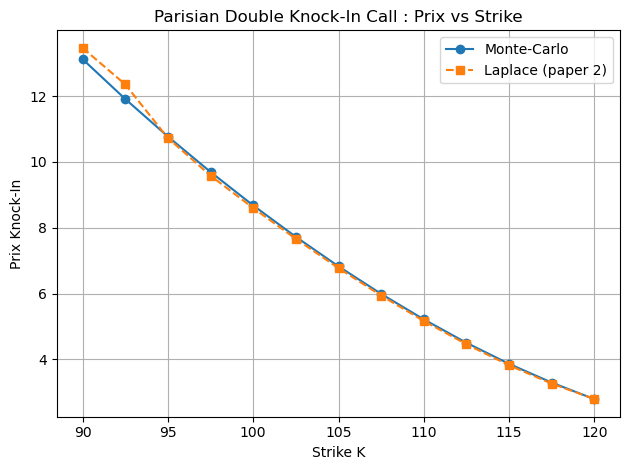

In [5]:

import numpy as np
import matplotlib.pyplot as plt

from laplace_double_parisian import price_parisian_double_in_call_lt
from mc_double_parisian      import simulate_paths_bs, price_parisian_double_in_call_mc


S0   = 100
L, U = 90, 110                  
r, q = 0.03, 0.00                
sigma = 0.20                     
T     = 1.0                       
steps = 252                     
paths = 40_000                  
sub   = 5                         


K_grid = np.linspace(90, 120, 13) 
D      = 20 / 252                 

mc_prices, lt_prices = [], []


for K in K_grid:

    S_paths = simulate_paths_bs(S0, r, q, sigma, T,
                                steps, paths, seed=321, sub=sub)

    mc = price_parisian_double_in_call_mc(S_paths, K, L, U,
                                          r, T, D, steps*sub)

    lt = price_parisian_double_in_call_lt(S0, K, L, U,
                                          r, q, sigma, T, D,
                                          alpha=8.0, N=30)

    mc_prices.append(mc); lt_prices.append(lt)
    print(f"K = {K:6.2f}  ->  MC = {mc:6.4f}   LT = {lt:6.4f}")


plt.plot(K_grid, mc_prices, 'o-', label='Monte-Carlo')
plt.plot(K_grid, lt_prices, 's--', label='Laplace ')
plt.title('Parisian Double Knock-In Call : Prix vs Strike')
plt.xlabel('Strike K')
plt.ylabel('Prix Knock-In')
plt.grid(True)
plt.legend()
plt.tight_layout(); plt.show()


D =  7 j  ->  MC = 0.2551   LT = 0.0583
D =  9 j  ->  MC = 0.3279   LT = 0.1425
D = 11 j  ->  MC = 0.3974   LT = 0.1612
D = 13 j  ->  MC = 0.4751   LT = 0.1912
D = 15 j  ->  MC = 0.5614   LT = 0.2841
D = 17 j  ->  MC = 0.6423   LT = 0.4573
D = 19 j  ->  MC = 0.7381   LT = 0.6925


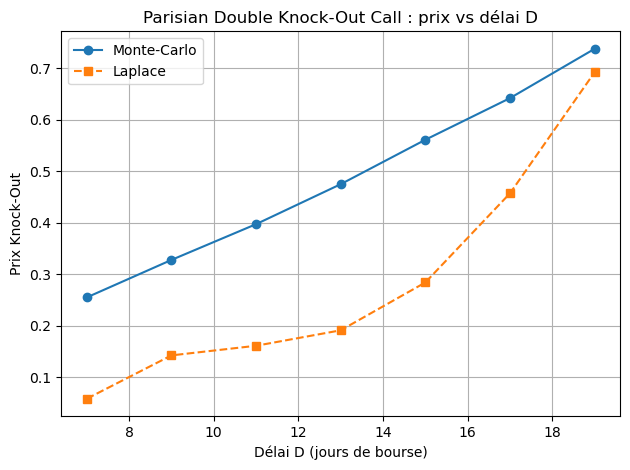

In [12]:
# example_knockout_vs_delay.py
import numpy as np, matplotlib.pyplot as plt
from laplace_double_parisian import price_parisian_double_out_call_lt
from mc_double_parisian      import (simulate_paths_bs,
                                     price_parisian_double_out_call_mc)

# ----------------- paramètres de base -----------------
S0, K, L, U = 100, 100, 90, 110
r, q, sigma  = 0.03, 0.0, 0.20
T, steps     = 1.0, 252
paths, sub   = 40_000, 5                 # Monte-Carlo

delays_days  = np.arange(7, 20, 2)       # 5,7,9,…,19 jours ouvrés
mc_prices, lt_prices = [], []

# ----------------- boucle sur le délai D -----------------
for d in delays_days:
    D = d / 252                          # fraction d’année
    S = simulate_paths_bs(S0, r, q, sigma,
                          T, steps, paths,
                          seed=2024, sub=sub)

    mc = price_parisian_double_out_call_mc(
            S, K, L, U, r, T, D, steps*sub)

    lt = price_parisian_double_out_call_lt(
            S0, K, L, U, r, q, sigma, T, D,
            alpha=8.0, N=30)

    mc_prices.append(mc); lt_prices.append(lt)
    print(f"D = {d:2d} j  ->  MC = {mc:6.4f}   LT = {lt:6.4f}")

# ----------------- tracé -----------------
plt.plot(delays_days, mc_prices, 'o-', label='Monte-Carlo')
plt.plot(delays_days, lt_prices, 's--', label='Laplace')
plt.title('Parisian Double Knock-Out Call : prix vs délai D')
plt.xlabel('Délai D (jours de bourse)')
plt.ylabel('Prix Knock-Out')
plt.grid(); plt.legend(); plt.tight_layout(); plt.show()


K =  95.00  ->  MC = 1.4114   LT = 1.4547
K =  97.08  ->  MC = 1.1041   LT = 1.2153
K =  99.17  ->  MC = 0.8398   LT = 0.9225
K = 101.25  ->  MC = 0.6186   LT = 0.6732
K = 103.33  ->  MC = 0.4390   LT = 0.4785
K = 105.42  ->  MC = 0.2979   LT = 0.3295
K = 107.50  ->  MC = 0.1922   LT = 0.2185
K = 109.58  ->  MC = 0.1182   LT = 0.1396
K = 111.67  ->  MC = 0.0690   LT = 0.0870
K = 113.75  ->  MC = 0.0382   LT = 0.0540
K = 115.83  ->  MC = 0.0198   LT = 0.0310
K = 117.92  ->  MC = 0.0097   LT = 0.0063
K = 120.00  ->  MC = 0.0046   LT = -0.0291


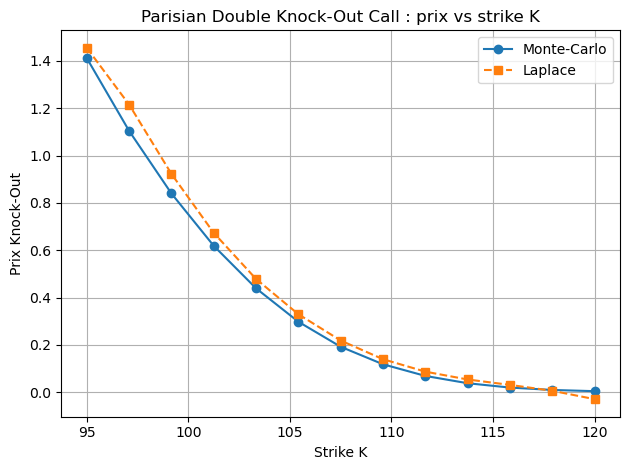

In [11]:
# example_knockout_vs_strike.py
import numpy as np, matplotlib.pyplot as plt
from laplace_double_parisian import price_parisian_double_out_call_lt
from mc_double_parisian      import (simulate_paths_bs,
                                     price_parisian_double_out_call_mc)

# ----------------- paramètres fixes -----------------
S0       = 100
L, U     = 90, 110
r, q     = 0.03, 0.0
sigma    = 0.20
T, steps = 1.0, 252
paths, sub = 40_000, 5

D = 20 / 252                         # délai fixé (20 jours)
K_grid = np.linspace(95, 120, 13)    # 90,92.5,…,120
mc_prices, lt_prices = [], []

# ----------------- boucle sur K -----------------
for K in K_grid:
    S_paths = simulate_paths_bs(S0, r, q, sigma,
                                T, steps, paths,
                                seed=2025, sub=sub)

    mc = price_parisian_double_out_call_mc(
            S_paths, K, L, U, r, T, D, steps*sub)

    lt = price_parisian_double_out_call_lt(
            S0, K, L, U, r, q, sigma, T, D,
            alpha=8.0, N=30)

    mc_prices.append(mc); lt_prices.append(lt)
    print(f"K = {K:6.2f}  ->  MC = {mc:6.4f}   LT = {lt:6.4f}")

# ----------------- tracé -----------------
plt.plot(K_grid, mc_prices, 'o-', label='Monte-Carlo')
plt.plot(K_grid, lt_prices, 's--', label='Laplace')
plt.title('Parisian Double Knock-Out Call : prix vs strike K')
plt.xlabel('Strike K')
plt.ylabel('Prix Knock-Out')
plt.grid(); plt.legend(); plt.tight_layout(); plt.show()
